                      RMSE       R^2
Decision Tree  8543.738382  0.807370
Random Forest  8606.165900  0.804545
XGBoost        8725.302230  0.799096


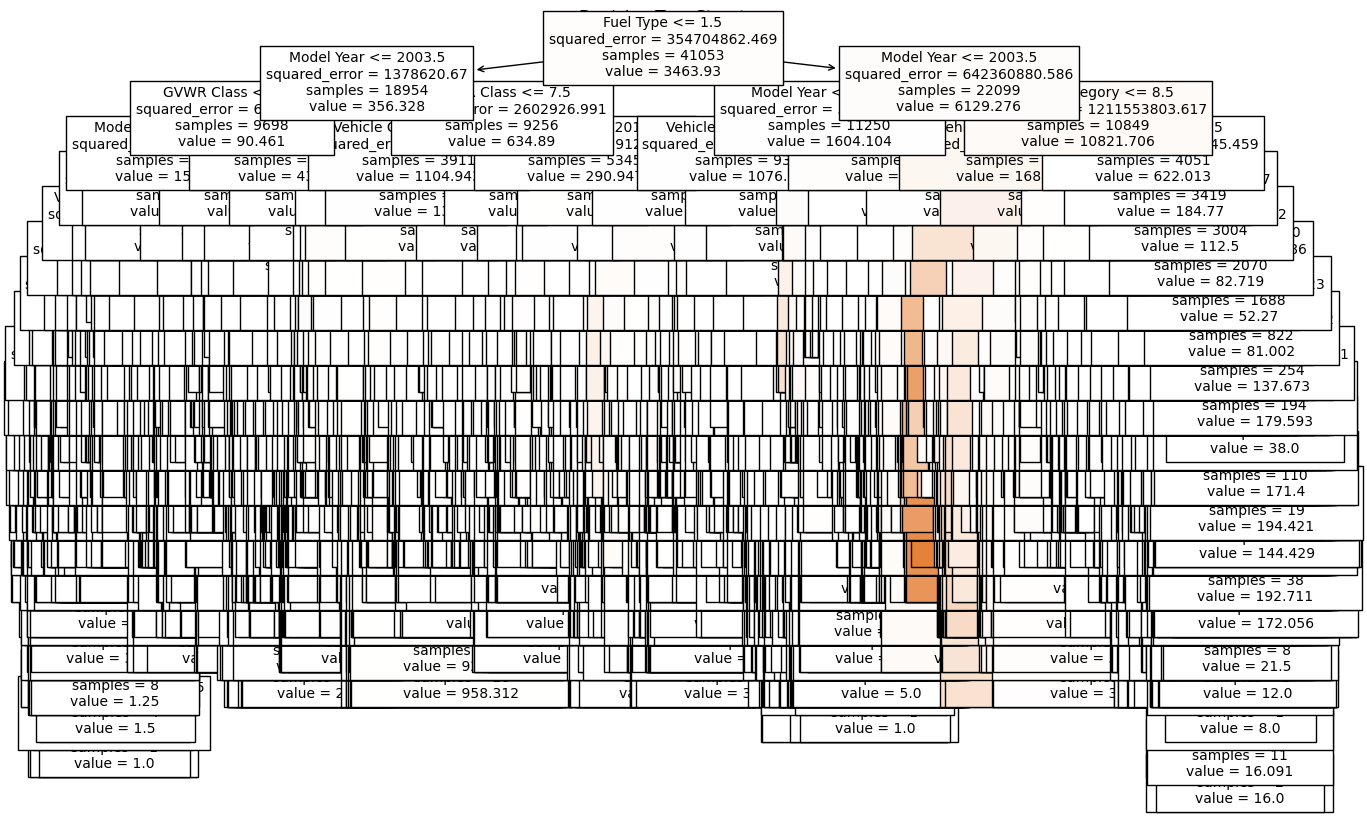

In [20]:
!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

train_data = pd.read_excel(r'C:\Users\HP\Downloads\training.xlsx', sheet_name='Sheet1')
scoring_data = pd.read_excel(r'C:\Users\HP\Downloads\scoring.xlsx', sheet_name='Sheet1')

features = ['Vehicle Category', 'GVWR Class', 'Fuel Type', 'Model Year', 'Fuel Technology']
target = 'Vehicle Population'

from sklearn.preprocessing import LabelEncoder

def clean_column(data, column_name):
    data[column_name] = data[column_name].astype(str)
    data[column_name] = data[column_name].fillna('Unknown')

columns_to_encode = ['Vehicle Category', 'GVWR Class', 'Fuel Type', 'Fuel Technology']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    clean_column(train_data, col)
    clean_column(scoring_data, col)
    train_data[col] = label_encoder.fit_transform(train_data[col])
    scoring_data[col] = label_encoder.transform(scoring_data[col])  # Use the same encoder for scoring data

X_train = train_data[features]
y_train = train_data[target]

X_test = scoring_data[features]
y_test = scoring_data[target]

models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror')
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return rmse, r2

results = {}

for model_name, model in models.items():
    try:
        rmse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
        results[model_name] = {'RMSE': rmse, 'R^2': r2}
    except Exception as e:
        results[model_name] = {'Error': str(e)}

results_df = pd.DataFrame(results).T
print(results_df)

plt.figure(figsize=(15, 10))
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
plot_tree(dt_model, filled=True, feature_names=features, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

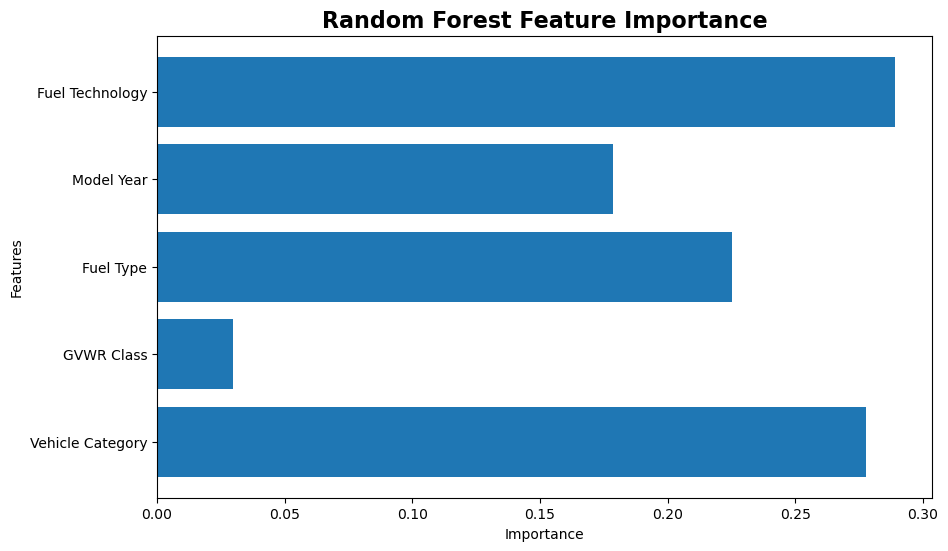

In [12]:
rf_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, rf_importances)
plt.title("Random Forest Feature Importance", fontsize=16, weight='bold')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

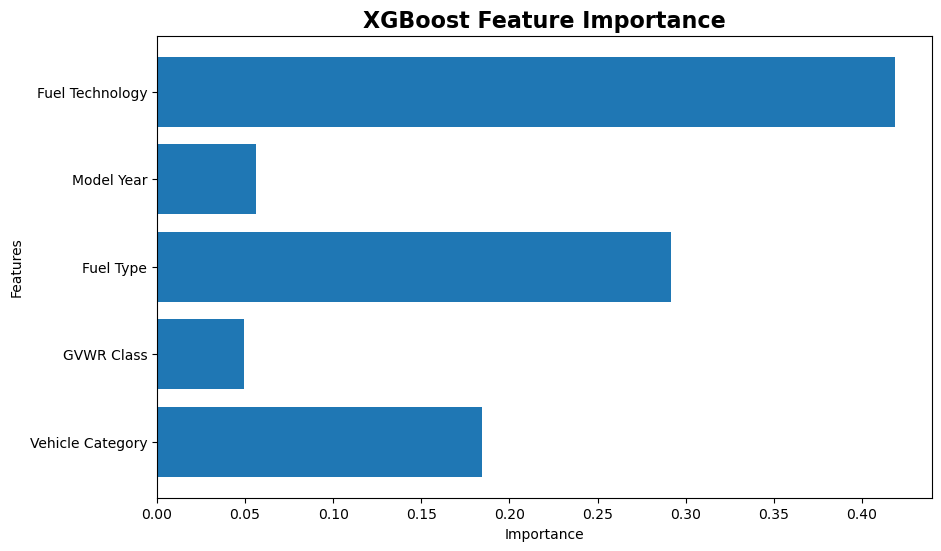

In [17]:
xgb_importances = xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, xgb_importances)
plt.title("XGBoost Feature Importance", fontsize=16, weight='bold')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()